# Ex5

In [69]:
%matplotlib inline

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import minimize

## Part 1: Loading and Visualizing Data

Loading and Visualizing Data ...

In [71]:
data = sio.loadmat('ex5data1.mat',squeeze_me=True)
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
Xtest = data['Xtest']
ytest = data['ytest']
m = X.shape[0]
X_in = np.column_stack((np.ones(m),X))
X_in = np.vstack([np.ones(m), X]).T
Xval_in = np.vstack([np.ones(Xval.shape[0]), Xval]).T


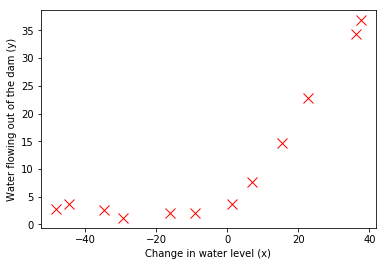

In [72]:
plt.plot(X,y,'rx',markersize=10,linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)');

## Part 2: Regularized Linear Regression Cost

### Cost function
$$\large J(\theta)=\frac{1}{2m}\left(\sum_{i=1}^{m}\left(h_\theta(x^{i})-y^{(i)}\right)^2\right)+\frac{\lambda}{2m}\left(\sum_{j=1}^{n}\theta_j^2\right)$$
### Partial derivative
$$\large \frac{\partial J(\theta)}{\partial \theta_0}=\frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}\text{ for $j=0$}$$
$$\large \frac{\partial J(\theta)}{\partial \theta_j}=\left(\frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}\right)+\frac{\lambda}{m}\theta_j\text{ for $j>=1$}$$

In [73]:
def linear_reg_cost_function(theta, X, y ,l):
    err = X @ theta - y
    J = ( err.T @ err + l * theta[1:].T @ theta[1:] )  / (2 * X.shape[0])
    
    grad = X.T @ err
    grad[1:] += l * theta[1:]
    grad /= X.shape[0]

    return J, grad

In [74]:
theta = np.ones(2)
J, grad = linear_reg_cost_function(theta, X_in, y,  1)
print('Cost at theta = [1 ; 1]: %f\n(this value should be about 303.993192)' % J)

Cost at theta = [1 ; 1]: 303.993192
(this value should be about 303.993192)


## Part 3: Regularized Linear Regression Gradient

In [75]:
print('Gradient at theta = [1 ; 1]:  [%f; %f] \n(this value should be about [-15.303016; 598.250744])' % (grad[0], grad[1]))

Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])


## Part 4: Train Linear Regression

In [76]:
def train_linear_reg(X, y , l):
    initial_theta = np.zeros(X.shape[1])
    s = minimize(linear_reg_cost_function,initial_theta,args=(X,y,l),jac=True,
                 method='BFGS',options={'maxiter':200})
    return s['x']

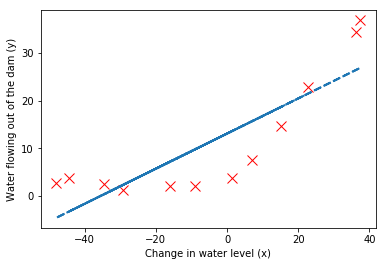

In [77]:
l = 0
theta = train_linear_reg(X_in, y, l)
plt.plot(X,y,'rx',markersize=10,linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, X_in @ theta, '--', linewidth=2);

##  Part 5: Learning Curve for Linear Regression

In [78]:
def learning_curve(X, y, Xval, yval, l):
    error_train = []
    error_val = []
    for i in range(1,X.shape[0]+1):
        X_i = X[:i,:]
        y_i = y[:i]
        theta = train_linear_reg(X_i, y_i, l)
        err_train = X_i @ theta - y_i
        error_train.append(err_train.T @ err_train / (2 * (X_i.shape[0])))
        err_val = Xval @ theta - yval
        error_val.append(err_val.T @ err_val / (2 * Xval.shape[0]))
    return error_train, error_val

# Training Examples	Train Error	Cross Validation Error
	1		0.000000	205.121096
	2		0.000000	110.300366
	3		3.286595	45.010231
	4		2.842678	48.368910
	5		13.154049	35.865165
	6		19.443963	33.829962
	7		20.098522	31.970986
	8		18.172859	30.862446
	9		22.609405	31.135998
	10		23.261462	28.936207
	11		24.317250	29.551432
	12		22.373906	29.433818


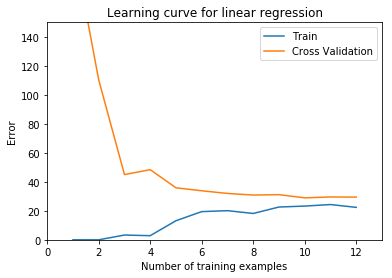

In [79]:
l = 0
error_train, error_val = learning_curve(X_in, y, Xval_in, yval, l)
plt.plot(range(1,m+1), error_train, range(1,m+1), error_val)
plt.title('Learning curve for linear regression')
plt.legend(('Train', 'Cross Validation'))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('\t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

## Part 6: Feature Mapping for Polynomial Regression

In [80]:
def poly_features(X, p):
    X_poly = np.ones((X.shape[0],p))
    for i in range(p):
        X_poly[:,i:] *= X[:, np.newaxis]
    return X_poly

In [81]:
def feature_normalize(X):
    mu = np.mean(X, 0)
    X_norm = X - mu
    sigma = np.std(X_norm, 0, ddof=1)
    return X_norm / sigma, mu, sigma

In [95]:
p = 8
X_poly = poly_features(X, p)
X_poly, mu, sigma = feature_normalize(X_poly)
X_poly = np.column_stack([np.ones(X_poly.shape[0]), X_poly])
X_poly_test = poly_features(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.column_stack([np.ones(X_poly_test.shape[0]), X_poly_test])

X_poly_val = poly_features(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.column_stack([np.ones(X_poly_val.shape[0]), X_poly_val])

In [96]:
print('Normalized Training Example 1:\n',X_poly[0])

Normalized Training Example 1:
 [ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]


##  Part 7: Learning Curve for Polynomial Regression

In [97]:
def plot_fit(min_x, max_x, mu, sigma, theta, p):
    x = np.arange(min_x - 15, max_x + 25, 0.05)
    X_poly = poly_features(x, p)
    X_poly -= mu
    X_poly /= sigma
    X_poly = np.column_stack([np.ones(x.shape[0]), X_poly])
    plt.plot(x, X_poly @ theta, '--', linewidth=2)

In [98]:
l = 0

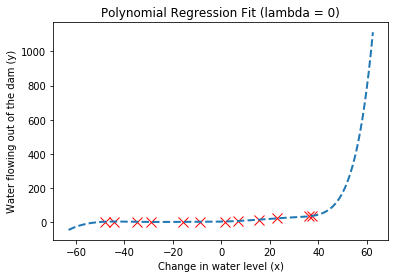

In [99]:
theta = train_linear_reg(X_poly, y, l)
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plot_fit(np.min(X), np.max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title(f'Polynomial Regression Fit (lambda = {l})');

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	160.721900
  	2		0.000000	160.121476
  	3		0.000000	61.754820
  	4		0.000000	61.928933
  	5		0.000000	6.597854
  	6		0.000000	10.645155
  	7		0.000000	27.993178
  	8		0.000000	22.704887
  	9		0.000000	24.104144
  	10		0.010818	97.167269
  	11		0.031219	51.136173
  	12		0.028891	54.159838


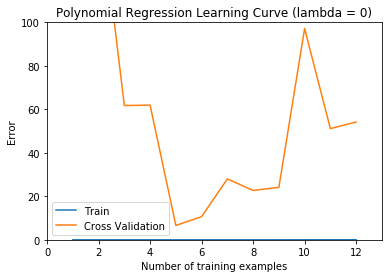

In [100]:
error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, l)
plt.plot(range(1,m+1), error_train, range(1,m+1), error_val);
plt.title(f'Polynomial Regression Learning Curve (lambda = {l})')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(('Train', 'Cross Validation'))
print('Polynomial Regression (lambda = %f)\n' % l)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

## Part 8: Validation for Selecting Lambda

In [101]:
def validation_curve(X, y, Xval, yval):
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    error_train = []
    error_val = []
    for l in lambda_vec:
        theta = train_linear_reg(X, y, l)
        err_train = X @ theta - y
        error_train.append(err_train.T @ err_train / (2 * X.shape[0]))
        err_val = Xval @ theta - yval
        error_val.append(err_val.T @ err_val / (2 * Xval.shape[0]))
    return lambda_vec, error_train, error_val
        

lambda		Train Error	Validation Error
 0.000000	0.028891	54.159838
 0.001000	0.112692	9.836200
 0.003000	0.170962	16.296046
 0.010000	0.221493	16.948494
 0.030000	0.281849	12.827735
 0.100000	0.459320	7.586831
 0.300000	0.921762	4.636833
 1.000000	2.076188	4.260635
 3.000000	4.901352	3.822907
 10.000000	16.092207	9.945503


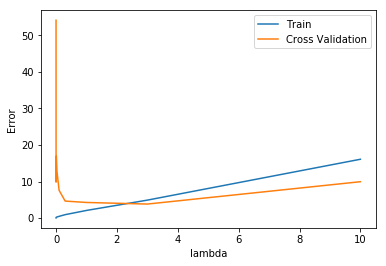

In [102]:
lambda_vec, error_train, error_val = validation_curve(X_poly, y, X_poly_val, yval)
plt.plot(lambda_vec, error_train, lambda_vec, error_val)
plt.legend(('Train', 'Cross Validation'))
plt.xlabel('lambda')
plt.ylabel('Error')
print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))